# Homework 4: (Part 2)

Instructions:

1. Include your name and student ID in the placeholders below

2. Follow the prompts (i.e. text beginning with #) in each cell to answer each question

3. Start your homework by running the code from the beginning of the homework i.e. the Setup Sections

4. You can try to confirm your answer by running each cell

5. Remember each question is for/worth one (1) point

6. Remember to SAVE YOUR WORK

7. Upload your completed Jupyter notebook to Canvas before or on the due date

8. The questions challenge you to think creatively and critically and sythesize the concepts you are learning to produce
   new information




# Add your student details below

Student Name: Luna McBride

Student ID: 107607144

In [ ]:
##########################################################################################################

In [2]:
#Setup Section 1: Run This Cell first before you answer Questions 1 - 6

#The variable definitions for the data frame below are available at:

#https://vincentarelbundock.github.io/Rdatasets/doc/AER/CollegeDistance.html

#Look at the variables in the data frame once they dispplay.

import pandas as pd
from pandas import read_csv
import seaborn as sns

#Obtain dataset and display data frame:
college_data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/AER/CollegeDistance.csv", index_col = 0).dropna()
college_data.head()

,gender,ethnicity,score,fcollege,mcollege,home,urban,unemp,wage,distance,tuition,education,income,region
rownames,,,,,,,,,,,,,,
1,male,other,39.150002,yes,no,yes,yes,6.2,8.09,0.2,0.88915,12,high,other
2,female,other,48.869999,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other
3,male,other,48.740002,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other
4,male,afam,40.400002,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other
5,female,other,40.480000,no,no,no,yes,5.6,8.09,0.4,0.88915,13,low,other


C:\Users\lunam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


The score variable has a mean of 50.88902933684601, a median of 51.18999862670898, and a mode of 56.02000045776367.



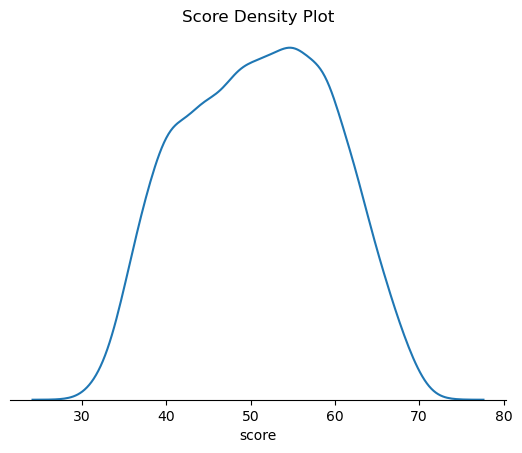

In [2]:
#QUESTION 1

#Look at the variables in the data frame above.

#Write seaborn code that uses a visual/chart to prove to an attention-deficient executive
#that variable score from the data frame above, does not have a perfectly normal probability distribution function/curve. 

#Write your code/answer below:
score = college_data["score"] #Put the score data into a new variable so I do not have to type it over and over

sns.set_style({"ytick.color":"white"}) #Remove the y ticks
sns.kdeplot(score).set(title = "Score Density Plot", ylabel = None, yticklabels = []) #Plot a KDE for the score, adding a title to make more clear
sns.despine(left = True) #Remove the border after experimenting. This has been discussed in class, so I utilized the seaborn docs to remove that load


#Print the mean, median, and mode of the score for the sake of my learning, making it more clear for myself
print(f"The score variable has a mean of {score.mean()}, a median of {score.median()}, and a mode of {score.mode()[0]}.\n")


C:\Users\lunam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


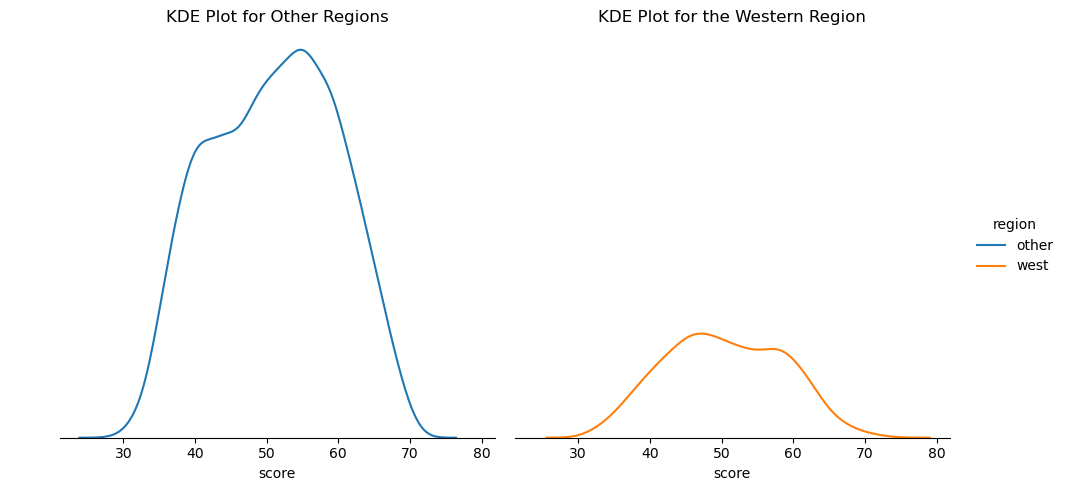

In [3]:
#QUESTION 2

#You find that variable region is a categorical variable containing only two categories/groups.

#A friend says that it is possible that conditioning the kernel density plot of score on region will prove that observations
#from one of the groups have a perfectly normal probability distribution function/curve.

#You disagree with that view. Write seaborn code that uses a visual/chart to prove your case.

#Write your code/answer below:
region = college_data["region"] #Separate the region data into its own variable
plot = sns.displot(kind = "kde", x = score, hue = region, col = region).set(ylabel = "") #Plot the KDE plot

#Source for changing the title on each plot: https://stackoverflow.com/questions/43920341/facetgrid-change-titles
plots = plot.axes.flatten() #Flatten the axes to access them
plots[0].set_title("KDE Plot for Other Regions") #Set the title for the first plot
plots[1].set_title("KDE Plot for the Western Region") #Set the title for the second plot
sns.despine(left = True) #Remove the borders

Neither result is normal. As such, neither group provides a perfect normal function and the friend is wrong.

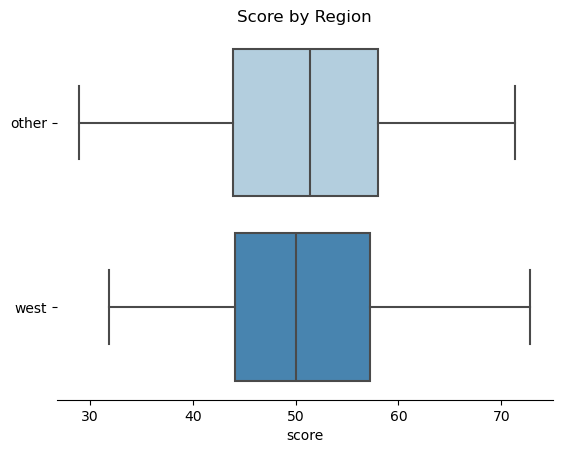

In [4]:
#QUESTION 3

#Use a visual/chart to show that the median of score, conditioned on region is different for the groups in region 


#Write your code/answer below:
sns.set_style({"ytick.color":"black"}) #Add the y ticks back in for the labels
plot = sns.boxplot(x = score, y = region, palette = "Blues").set(ylabel = "", title = "Score by Region") #Plot the boxplot to show the medians
sns.despine(left = True) #Remove the box

In [5]:
#QUESTION 4

#In your answer to Question 3 above,you conditioned your plot of score on region, a variable that has two groups/categories.
#Which of those groups appears to have observations with the larger interquartile range? Choose one the options below:

#Option 1: other
#Option 2: west


#Write your code/answer below:

print("Other appears to have the larger interquartile range.")

Other appears to have the larger interquartile range.


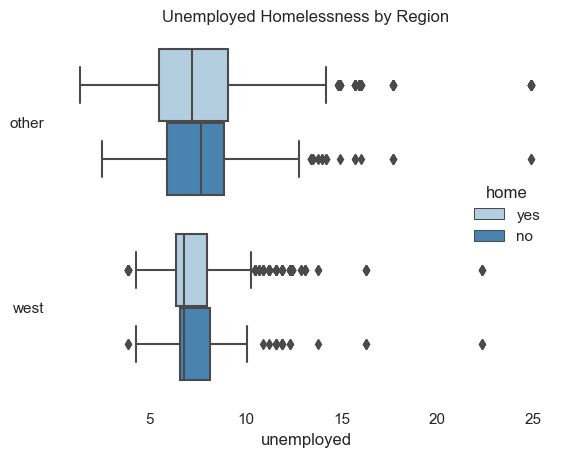

In [6]:
#QUESTION 5:

#Write Python seaborn code to draw a boxplot of the variable unemp as follows:

#1. Condition your plot first on region 
#2. Condition on home next


#Write your code/answer below:
sns.set(rc = {"legend.frameon":False, "axes.facecolor":"w"}) #Remove the frame on the legend and reset the background to white, as otherwise this would change it to gray
plot = sns.boxplot(x = college_data["unemp"], y = region, hue = college_data["home"], palette = "Blues") #Plot the boxplots
plot.set(ylabel = "", title = "Unemployed Homelessness by Region", xlabel = "unemployed") #Set the title and x label while removing the y label
sns.despine(left = True) #Remove the border box

In [7]:
#QUESTION 6:

#Consider your chart in Question 5 above.

#What appears to be visible about the size of the interquartile range of variable unemp when conditioned on region and home
#(in that order) and when:

#region = other
#home = yes

#compared to the interquartile range of unemp when:

#region = west
#home = no

#Write your answer below:


print("""
other-yes appears to have a much wider interquartile range, a higher median,
and both a lower Q1 and a higher Q3 than west-no. This means the spread of unemployment
in other regions who have homes is much larger than the spread of unemployed westerners with no home.""")


other-yes appears to have a much wider interquartile range, a higher median,
and both a lower Q1 and a higher Q3 than west-no. This means the spread of unemployment
in other regions who have homes is much larger than the spread of unemployed westerners with no home.


In [8]:
#Setup Section 2: Run This Cell first before you answer Questions 7 - 10

#The variable definitions for the data frame below are available at

#https://vincentarelbundock.github.io/Rdatasets/doc/AER/CPS1985.html

import pandas as pd
from pandas import read_csv
import seaborn as sns

#Obtain dataset and display data frame:
wage_data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/AER/CPS1985.csv", index_col = 0).dropna()
wage_data.head()

,wage,education,experience,age,ethnicity,region,gender,occupation,sector,union,married
rownames,,,,,,,,,,,
1,5.10,8,21,35,hispanic,other,female,worker,manufacturing,no,yes
1100,4.95,9,42,57,cauc,other,female,worker,manufacturing,no,yes
2,6.67,12,1,19,cauc,other,male,worker,manufacturing,no,no
3,4.00,12,4,22,cauc,other,male,worker,other,no,no
4,7.50,12,17,35,cauc,other,male,worker,other,no,yes


C:\Users\lunam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lunam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Wage Split by Gender and Ethnicity'),
 Text(15.125000000000002, 0.5, '')]

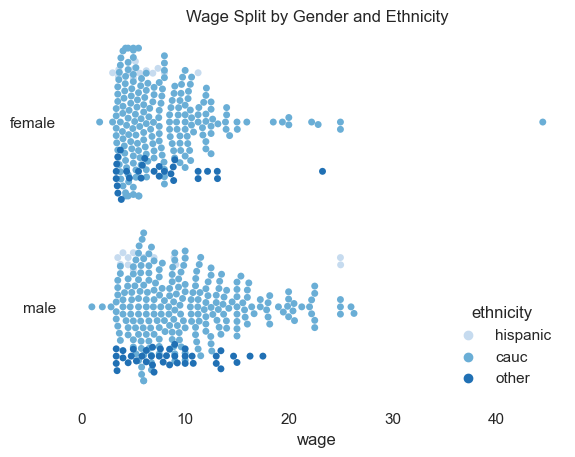

In [10]:
#QUESTION 7:


#Use a swarmplot to breakout/condition variable wage:
#First by/on gender
#Second by/on ethnicity

#Write your code/answer below:
plot = sns.swarmplot(data = wage_data, x = "wage", y = "gender", hue = "ethnicity", dodge = True, palette = "Blues") #Plot the swarm plot
plot.set(title = "Wage Split by Gender and Ethnicity", ylabel = "") #Set the title and remove the y axis label

In [11]:
#QUESTION 8:

#Consider your chart in Question 7 above.

#What insight is clearly visible about wage when gender = female



#Write your code/answer below:
print("""
The majority of wages for women fall below 20 in this dataset no matter the ethnicity. 
There is also one interesting outlier, who is making way more than even the men.""")


The majority of wages for women fall below 20 in this dataset no matter the ethnicity. 
There is also one interesting outlier, who is making way more than even the men.


In [12]:
#QUESTION 9:

#From your chart in Question 7 above, when wage is less than or equal to $20 (i.e wage <=20),your friend argues that 
#the probability of ethnicity = hispanic is greater than the probability of ethnicity = cauc. 

#Does your visual/chart in Question 7 lead you to AGREE or DISAGREE with your friend? Choose one.


#Write your code/answer below:
print("""
It is hard to tell from the graph without doing the math, but I would likely agree    
with the friend due to the heavy majority of caucasian women who fall below that line and 
the underrepresentation of Hispanic people overall in the dataset, 
which would then put more weight on the Hispanic people above the 20 dollar line.""")


It is hard to tell from the graph without doing the math, but I would likely agree    
with the friend due to the heavy majority of caucasian women who fall below that line and 
the underrepresentation of Hispanic people overall in the dataset, 
which would then put more weight on the Hispanic people above the 20 dollar line.


C:\Users\lunam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0, 0.5, ''), Text(0.5, 1.0, 'Age Densities in the Wage Data')]

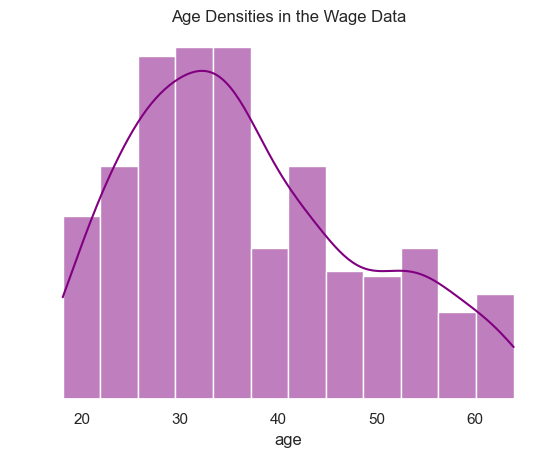

In [13]:
#QUESTION 10:

#Write Python Seaborn code to modify the chart in Question 7 to do the following:

#Draw a histogram for variable age in wage_data - with an estimate of the probability distribution function (i.e. a KDE line)

#Write your code/answer below:

sns.set_style({"ytick.color":"white"}) #Remove the y ticks again
plot = sns.histplot(data = wage_data, x = "age", kde = True, color = "purple") #Plot the histogram with the kde plot, changing the color to purple since it makes color differences more clear
plot.set(ylabel = "", title = "Age Densities in the Wage Data") #Add the title and remove the y label

Homework 3 had this, but I specifically did not use indexing on the corr() and describe() results for a challenge. This time, I will index on them.

In [14]:
#Setup Section 3: Run this cell before you attempt Questions 11 - 20


#Import pandas as we try to create a Pandas Data Framne that contains the data

import pandas as pd

#Import Matplotlib

from matplotlib import pyplot as plt

import seaborn as sns

# load dataset from the Web

url = 'https://vincentarelbundock.github.io/Rdatasets/csv/AER/USGasG.csv'
USG = pd.read_csv(url,index_col=0).dropna()

#display dataframe USG so you can see the variables in USG

USG



,gas,price,income,newcar,usedcar,transport,durable,nondurable,service,population
rownames,,,,,,,,,,
1,129.7,0.925,6036,1.045,0.836,0.810,0.444,0.331,0.302,180.7
2,131.3,0.914,6113,1.045,0.869,0.846,0.448,0.335,0.307,183.7
3,137.1,0.919,6271,1.041,0.948,0.874,0.457,0.338,0.314,186.5
4,141.6,0.918,6378,1.035,0.960,0.885,0.463,0.343,0.320,189.2
5,148.8,0.914,6727,1.032,1.001,0.901,0.470,0.347,0.325,191.9
6,155.9,0.949,7027,1.009,0.994,0.919,0.471,0.353,0.332,194.3
7,164.9,0.970,7280,0.991,0.970,0.952,0.475,0.366,0.342,196.6
8,171.0,1.000,7513,1.000,1.000,1.000,0.483,0.375,0.353,198.7
9,183.4,1.014,7728,1.028,1.028,1.046,0.501,0.390,0.368,200.7


In [15]:
#QUESTION 11: 

#Write code to create a subset of USG data frame (call the dataframe USG_Subset) 
#with/including only the features gas, price,income,service, population

#Write your answer below:
subset_list = ["gas", "price", "income", "service", "population"] #Create a list of the columns we want in the subset
USG_Subset = USG[subset_list] #Create the subset list
USG_Subset.head() #Take a peek at the data

,gas,price,income,service,population
rownames,,,,,
1,129.7,0.925,6036,0.302,180.7
2,131.3,0.914,6113,0.307,183.7
3,137.1,0.919,6271,0.314,186.5
4,141.6,0.918,6378,0.320,189.2
5,148.8,0.914,6727,0.325,191.9


In [16]:
#QUESTION 12: 

#Write code to display the number of rows and columns that the USG_Subset object has

#Write your answer below:
print(f"USG_Subset has {len(USG_Subset)} rows and {len(USG_Subset.columns)} columns")

USG_Subset has 36 rows and 5 columns


In [17]:
#QUESTION 13: 

#Write code to describe the USG_Subset object i.e. display the count, mean, std, min, 25%, 50%, 75%, max

#Write your answer below:
USG_Subset.describe().T #Get the description and transpose it to make it more readable

,count,mean,std,min,25%,50%,75%,max
gas,36.0,226.094444,50.591817,129.700,192.70000,235.1500,270.00000,297.800
price,36.0,2.316611,1.251735,0.914,1.03875,1.9225,3.71775,4.109
income,36.0,9232.861111,1786.380845,6036.000,7850.25000,9551.5000,10799.75000,11934.000
service,36.0,0.836250,0.496515,0.302,0.38150,0.6730,1.23575,1.786
population,36.0,221.947222,24.008385,180.700,202.20000,221.4000,241.22500,263.200


In [18]:
#QUESTION 14: 

#Write code to display the correlation coefficients among all the features of USG_Subset

#Write your answer below:
USG_Subset.corr() #Get the correlation coefficients

,gas,price,income,service,population
gas,1.000000,0.769657,0.975365,0.853434,0.944217
price,0.769657,1.000000,0.877395,0.898388,0.905520
income,0.975365,0.877395,1.000000,0.930821,0.989222
service,0.853434,0.898388,0.930821,1.000000,0.968719
population,0.944217,0.905520,0.989222,0.968719,1.000000


In [19]:
#QUESTION 15:

#How many rows does the USG_Subset dataset have?

#Write your answer below:
print(f"USG_Subset has {len(USG_Subset)} rows")

USG_Subset has 36 rows


In [20]:
#QUESTION 16:

#Which feature of the USG_Subset dataset has the largest mean?

#Write your answer below:
means = USG_Subset.describe().T["mean"] #Get the list of means
max_means = max(means) #Get the largest mean
index = means.index #Pull the index of means to get the feature names
combo = dict(zip(means, index)) #Create a dictionary connecting the means to the feature names
best_combo = combo[max_means] #Use the largest mean as a key to get the name of the feature with the largest mean

print(f"The feature with the largest mean is {best_combo} with a mean of {max_means}")

The feature with the largest mean is income with a mean of 9232.861111111111


In [21]:
#QUESTION 17: 

#Which feature of the USG_Subset dataset has the smallest standard deviation (std)?

#Write your answer below:
stds = USG_Subset.describe().T["std"] #Get the list of standard deviations
min_stds = min(stds) #Get the smallest standard deviation
index = stds.index #Pull the index of stds to get the feature names
combo = dict(zip(stds, index)) #Create a dictionary connecting the standard deviations to the feature names
best_combo = combo[min_stds] #Use the smallest standard deviation as a key to get the name of the feature with the smallest standard deviation

print(f"The feature with the smallest standard deviation is {best_combo} with a standard deviation of {min_stds}")

The feature with the smallest standard deviation is service with a standard deviation of 0.4965154795457755


In [22]:
#QUESTION 18: 

#What is the interquartile range (IQR) of feature price?

#Write your answer below:
Q1_price = USG_Subset.describe().T["25%"]["price"] #Get the Q1 of price
Q3_price = USG_Subset.describe().T["75%"]["price"] #Get the Q3 of price

print(f"The Interquartile Range of price is Q1: {Q3_price} minus Q3: {Q1_price} or {Q3_price - Q1_price}")

The Interquartile Range of price is Q1: 3.71775 minus Q3: 1.0387499999999998 or 2.6790000000000003


In [23]:
#QUESTION 19: 

#What is the correlation coefficient between the feature/variable gas and itself?


#Write your answer below:
print(f"The correlation coefficient between gas and itself is {USG_Subset.corr()['gas']['gas']}")

The correlation coefficient between gas and itself is 1.0


In [24]:
#QUESTION 20: 

#What is the difference between (the correlation between gas and price) and (the correlation 
# service and income)?


#Write your answer below:
gas_price_corr = USG_Subset.corr()["gas"]["price"] #Get the gas-price correlation coefficient
service_income_corr = USG_Subset.corr()["service"]["income"] #Get the service-income correlation coefficient

print(f"The difference between the correlation of gas and price ({gas_price_corr}) and service and income ({service_income_corr}) is {gas_price_corr - service_income_corr}")

The difference between the correlation of gas and price (0.7696572528512197) and service and income (0.9308211092652765) is -0.16116385641405684


In [3]:
#Setup Section 4: Run this cell before you attempt Questions 21 - 30

#Loading Matplotlib and Seaborn

from matplotlib import pyplot as plt
import seaborn as sns

#Loading the mpg dataset and assigning to dataframe cars

cars = sns.load_dataset('mpg').dropna()

#Set seaborn style to "whitegrid" - display gridlines on white background for plots

sns.set_style('whitegrid')

#Checking the structure of the dataset - list of features/variables and their data types

cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [4]:
#QUESTION 21:

#Write the code to down to extract odd number of cylinders in cars. 
#Store the result in a variable called cars_odd 




#Write your answer below:
unique_cyls = list(cars['cylinders'].unique()) #Get the unique cylinder numbers to show what is possible
unique_cyls.sort() #Sort them
print(f"The number of cylinders available in the overall cars dataset is {unique_cyls}") #Print the unique cylinder values
cars_odd = cars.loc[cars["cylinders"] % 2 == 1] #Select only cars with odd numbers of cylinders using modulo
print(f"The number of cylinders available in the cars_odd variable is {cars_odd['cylinders'].unique()}") #Print the number of unique cylinders in the odd variable to show that the evens are gone
print(cars_odd.head()) #Take a peek at the data

The number of cylinders available in the overall cars dataset is [3, 4, 5, 6, 8]
The number of cylinders available in the cars_odd variable is [3 5]
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
71   19.0          3          70.0        97.0    2330          13.5   
111  18.0          3          70.0        90.0    2124          13.5   
243  21.5          3          80.0       110.0    2720          13.5   
274  20.3          5         131.0       103.0    2830          15.9   
297  25.4          5         183.0        77.0    3530          20.1   

     model_year  origin                name  
71           72   japan     mazda rx2 coupe  
111          73   japan           maxda rx3  
243          77   japan          mazda rx-4  
274          78  europe           audi 5000  
297          79  europe  mercedes benz 300d  


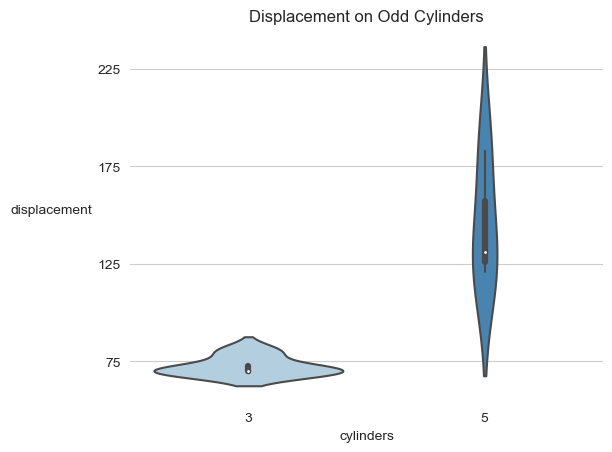

In [24]:
#QUESTION 22:

#For the cars_odd object above:
#Write code to generate a violin plot as follows:

#Breakout or condition the displacement variable on the types (category) of cylinders.
#Use horizontal axis for the categorical axis (cylinders) and vertical axis for the main variable (displacement)

#Write your answer below:

#Source for y label rotation: https://stackoverflow.com/questions/61936040/rotate-ylabel-in-seaborn-pairplot

plot = sns.violinplot(data = cars_odd, x = "cylinders", y = "displacement", palette = "Blues") #Create the violin plot
#plot.grid(False) #Keep the grid because it actually makes it easier to read in this case
plot.set_yticks(ticks = [75, 125, 175, 225],labels = [75, 125, 175, 225]) #Lessen the number of ticks on the y axis
plot.set_ylabel(plot.get_ylabel(), rotation = 0, horizontalalignment = "right") #Rotate the y label so you do not need to turn your head or read sideways
plot.set(title = "Displacement on Odd Cylinders") #Set the title
sns.despine(left = True, bottom = True) #Remove the boundary boxes
plt.tight_layout(pad = 1.7)
#plot.set_anchor((1, 0))
plt.savefig("horizontal_ylabel_displacement")

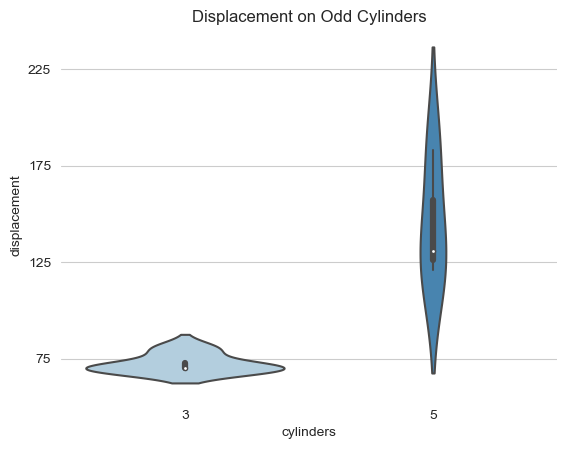

In [10]:
plot = sns.violinplot(data = cars_odd, x = "cylinders", y = "displacement", palette = "Blues") #Create the violin plot
#plot.grid(False) #Keep the grid because it actually makes it easier to read in this case
plot.set_yticks(ticks = [75, 125, 175, 225],labels = [75, 125, 175, 225]) #Lessen the number of ticks on the y axis
#plot.set_ylabel(plot.get_ylabel(), rotation = 0, horizontalalignment = "right") #Rotate the y label so you do not need to turn your head or read sideways
plot.set(title = "Displacement on Odd Cylinders") #Set the title
sns.despine(left = True, bottom = True) #Remove the boundary boxes
plt.savefig("vertical_ylabel_displacement")

Out of curiosity, now that I have flipped the y axis label, do you, the grader, feel like it is easier or harder to read? Does it reduce cognitive load like expected or increase it? I personally cannot tell and you, the grader, is the stakeholder in this context.

In [6]:
print(f"As for right now, the cars_odd variable only has the origins {cars_odd['origin'].unique()}")

As for right now, the cars_odd variable only has the origins ['japan' 'europe']


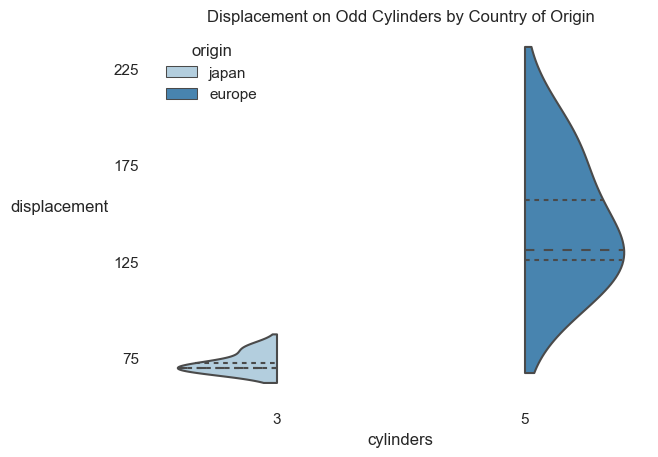

In [29]:
#QUESTION 23:

#For the cars_odd object you created above condition the displacement feature:

#first on cylinders (use horizontal axis)
#second on cars with origin Japan and Europe only (use hue function/feature) <----- The variable only has Japan and Europe to begin with.

#Split data - to use split feature, you must have exactly two values for the hue argument/parameter
# Split argument/parameter allows you compare two categories side-by-side to draw additional insights
#Dive deeper to see the quartiles of data using the inner argument i.e. set inner = 'quartiles'
# Place legend in location 2

#Write your answer below:

plot = sns.violinplot(data = cars_odd, x = "cylinders", y = "displacement", hue = "origin", split = True, inner = "quartiles", palette = "Blues") #Plot the violin plot
plot.set_yticks(ticks = [75, 125, 175, 225],labels = [75, 125, 175, 225]) #Lessen the number of ticks on the y axis
plot.set_ylabel(plot.get_ylabel(), rotation = 0, horizontalalignment = "right") #Rotate the y label so you do not need to turn your head or read sideways
plot.set(title = "Displacement on Odd Cylinders by Country of Origin") #Set the title
plot.grid(False) #Remove the grid
sns.move_legend(plot, 2) #Move the legend to location 2
sns.despine(left = True, bottom = True) #Remove the boundary boxes

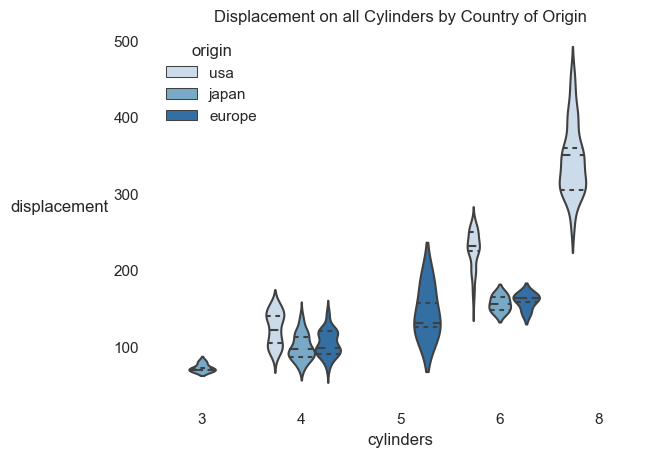

In [30]:
#Aside: violin plot on the whole cars dataset

plot = sns.violinplot(data = cars, x = "cylinders", y = "displacement", hue = "origin", inner = "quartiles", palette = "Blues") #Plot the violin plot
plot.set_ylabel(plot.get_ylabel(), rotation = 0, horizontalalignment = "right") #Rotate the y label so you do not need to turn your head or read sideways
plot.set(title = "Displacement on all Cylinders by Country of Origin") #Set the title
plot.grid(False) #Remove the grid
sns.move_legend(plot, 2) #Move the legend to location 2
sns.despine(left = True, bottom = True) #Remove the boundary boxes

In [31]:
#QUESTION 24:

#Which country has a higher 50th percentile overall across both cylinder categories from your answer to QUESTION 23? 



#Write your answer below:
print("""
Interestingly, the data only has 3 cylinders for Japan and 5 cylinders for Europe.
The aside violin plot for the whole cars dataset shows this to be the case for all
of the data rather than an error in the process.""")

print("""
That being said, the displacements on the 3 cylinder options are all lower than the
50th percentile for the 5 cylinder options. As such, Europe has the higher 50th percentile.""")


Interestingly, the data only has 3 cylinders for Japan and 5 cylinders for Europe.
The aside violin plot for the whole cars dataset shows this to be the case for all
of the data rather than an error in the process.

That being said, the displacements on the 3 cylinder options are all lower than the
50th percentile for the 5 cylinder options. As such, Europe has the higher 50th percentile.


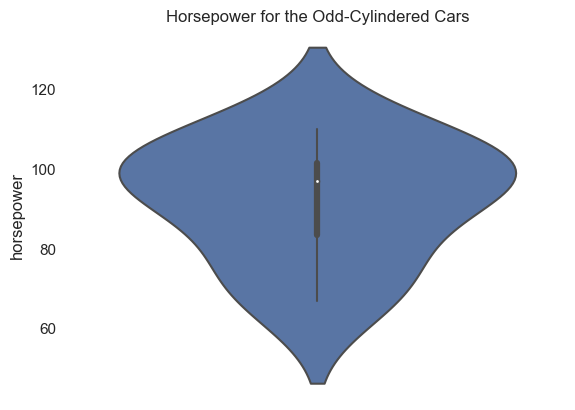

In [33]:
#QUESTION 25:

#For the cars_odd object you created above write the code to:

#Pass the horsepower variable to generate a violin plot


#Write your answer below:
sns.set_style("whitegrid", {'axes.grid' : False}) #Remove the grid
plot = sns.violinplot(data = cars_odd, y = "horsepower").set(title = "Horsepower for the Odd-Cylindered Cars") #Create a violin plot for the horsepower
sns.despine(left = True, bottom = True) #Remove the boundary boxes

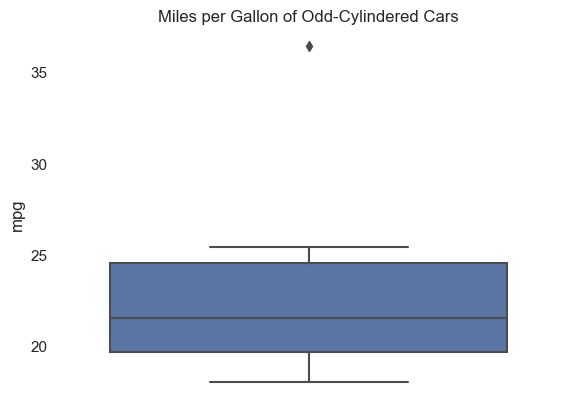

In [34]:
#QUESTION 26:

#Write Python Seaborn code to draw a boxplot for the mpg feature from cars_odd dataset


#Write your answer below:
plot = sns.boxplot(data = cars_odd, y = "mpg") #Create the boxplot for miles per gallon
plot.set_yticks(ticks = [20, 25, 30, 35],labels = [20, 25, 30, 35]) #Lessen the number of ticks on the y axis
plot.set(title = "Miles per Gallon of Odd-Cylindered Cars") #Add the title
sns.despine(left = True, bottom = True) #Remove the boundary boxes

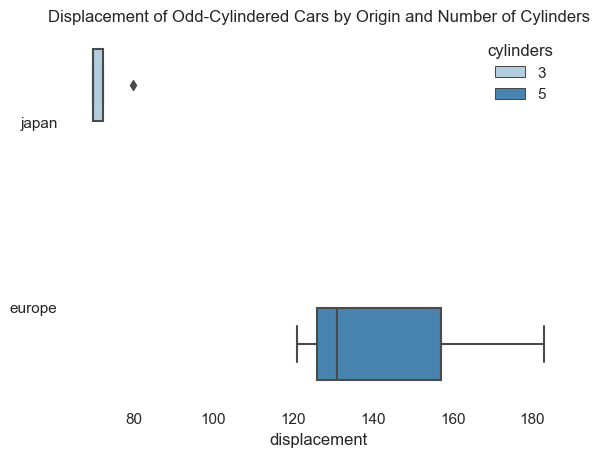

In [35]:
#QUESTION 27:

#Write Python seaborn code to draw boxplot for the displacement feature of the cars_odd feature.

#Condition your boxplot first on variable origin and then on variable cylinders 


#Write your answer below:
plot = sns.boxplot(data = cars_odd, x = "displacement", y = "origin", hue = "cylinders", palette = "Blues") #Plot the boxplot for displacement by origin and cylinders
plot.set(ylabel = "", title = "Displacement of Odd-Cylindered Cars by Origin and Number of Cylinders") #Add a title and remove the y label
sns.despine(left = True, bottom = True) #Remove the boundary boxes

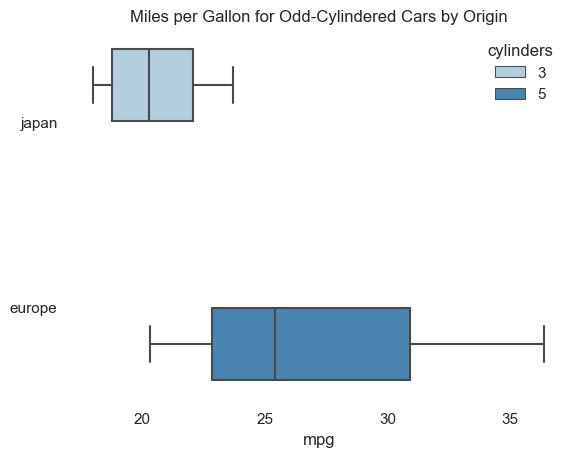

In [36]:
#QUESTION 28:

#Write the code to draw boxplot for the mpg feature of the cars_odd dataset

#Condition your boxplot first on the origin variable and then on the cylinders feature


#Write your answer below:
plot = sns.boxplot(data = cars_odd, x = "mpg", y = "origin", hue = "cylinders", palette = "Blues") #Plot the boxplots for mpg on origin and cylinders
plot.set_xticks(ticks = [20, 25, 30, 35],labels = [20, 25, 30, 35]) #Lessen the number of ticks on the x axis
plot.set(ylabel = "", title = "Miles per Gallon for Odd-Cylindered Cars by Origin") #Remove the y label and add the title
sns.despine(left = True, bottom = True) #Remove the boundary boxes

In [37]:
#QUESTION 29:

#From your boxplot for QUESTION 28 above: 

#Which origin category has the higher median (50% percentile) for mpg regardless of cylinders?


#Write your answer below:
print("""
European odd-cylindered cars have the higher median miles per gallon, 
which is higher than any value for the 3 cylinder versions. 
Since all 3 cylinder cars are Japanese and all 5 cylinder cars are European in the dataset,
that means the median miles per gallon value for European cars is also higher than the
highest mile per gallon value for all of the Japanese cars in the odd-cylinder numbered set.""")


European odd-cylindered cars have the higher median miles per gallon, 
which is higher than any value for the 3 cylinder versions. 
Since all 3 cylinder cars are Japanese and all 5 cylinder cars are European in the dataset,
that means the median miles per gallon value for European cars is also higher than the
highest mile per gallon value for all of the Japanese cars in the odd-cylinder numbered set.


In [38]:
#QUESTION 30:

#From your boxplot for QUESTION 28 above: 

#For which origin category are the observations for the mpg feature/variable less dispersed regardless of cylinder category?


#Write your answer below:
print("The Japanese odd-cylindered cars are less dispursed in terms of mile per gallon values.")

The Japanese odd-cylindered cars are less dispursed in terms of mile per gallon values.


In [ ]:
# *****************************************End of Homework***********************************************************